In [23]:
import matplotlib.pyplot as plt

import data_containers as dc
import traj_planner as tj

from importlib import reload 
reload(dc)
reload(tj)

import utils.qgc_utils as qgc
import trajectory_io as io

reload(qgc)
reload(io)

import pandas as pd
import pymap3d as pm
import numpy as np

In [24]:
site=dc.Site("./coords/site.json")
site.set_origin()

planner = tj.TrajectoryPlanner(site)

poi_enu = site.geodetic_to_enu(site.origin)

trajectory = planner.new_arc_trajectory_202412(
    nominal_poi = poi_enu, #poi with respect to which we compute the center of the arc
    nominal_az= 90,
    nominal_el= 47,
    nominal_srange= 500,
    # actual POI with respect to which we move
    poi = site.geodetic_to_enu(site.compute_barycenter()),
    delta_el= 10,
    num_steps_el= 5,
)
trajectory.plot_boresight=True

/home/alessandro/repos/drone_flightplans/data_containers.py:186: UserWarning: No origin provided: assuming the barycenter of all telescopes as origin.
  warnings.warn("No origin provided: assuming the barycenter of all telescopes as origin.", UserWarning)


In [128]:
rtk_correct_position=dc.Geodetic(lat=-22.95977498,
                           lon=-67.78669706,
                           alt=5182.214
                          )
rtk_broadcast_position=dc.Geodetic(lat=-22.9597732,
                           lon=-67.7866847,
                           alt=5173.020
                          )
#"""
rtk_broadcast_position=dc.Geodetic(lat=-22.9598362,
                           lon=-67.7864538,
                           alt=5168.080
                          )
#"""


In [129]:
import os
file_names = os.listdir("./litchi_data/")
file_name.startswith("2025-11-28")

False

In [138]:
import os
file_names = os.listdir("./litchi_data/")
telescope = "satp1"

for file_name in file_names:
    if file_name.startswith("2025-11-28"):
        
        ld = pd.read_csv("./litchi_data/"+file_name)
        geodetics_uncorr=np.zeros((ld.shape[0],3))
        geodetics_uncorr[:,0] = ld["latitude"]
        geodetics_uncorr[:,1] = ld["longitude"]
        geodetics_uncorr[:,2] = ld["altitude(m)"]+site.landing_site.alt
        
        enu_uncorr = site.geodetic_to_enu(geodetics_uncorr)
        
        enu_rtk_correct = site.geodetic_to_enu(rtk_correct_position)
        enu_rtk_broadcast = site.geodetic_to_enu(rtk_broadcast_position)
        
        offset = enu_rtk_broadcast-enu_rtk_correct
        
        enu_corr = enu_uncorr+offset.as_array()
        geodetic_corr = site.enu_to_geodetic(enu_corr)
        
        ypr = site.observe_points(geodetic_corr, telescope)
        
        out = pd.DataFrame()
        out["az"]=ypr[:,0]
        out["el"]=ypr[:,1]
        out["datetime(utc)"]=ld["datetime(utc)"]
        
        out.to_csv("altaz/"+file_name[:-4]+"_"+telescope+".csv")

In [136]:
file_name = "2025-11-29_14-32-48_v2"
telescope = "satp3"

ld = pd.read_csv("./litchi_data/"+file_name+".csv")
geodetics_uncorr=np.zeros((ld.shape[0],3))
geodetics_uncorr[:,0] = ld["latitude"]
geodetics_uncorr[:,1] = ld["longitude"]
geodetics_uncorr[:,2] = ld["altitude(m)"]+site.landing_site.alt

enu_uncorr = site.geodetic_to_enu(geodetics_uncorr)

enu_rtk_correct = site.geodetic_to_enu(rtk_correct_position)
enu_rtk_broadcast = site.geodetic_to_enu(rtk_broadcast_position)

offset = enu_rtk_broadcast-enu_rtk_correct

enu_corr = enu_uncorr+offset.as_array()
geodetic_corr = site.enu_to_geodetic(enu_corr)

ypr = site.observe_points(geodetic_corr, telescope)

out = pd.DataFrame()
out["az"]=ypr[:,0]
out["el"]=ypr[:,1]
out["datetime(utc)"]=ld["datetime(utc)"]

out.to_csv("altaz/"+file_name+"_"+telescope+".csv")

In [121]:
pd.to_datetime(ld['datetime(utc)'], utc=True)

0      2025-11-29 17:32:48.714000+00:00
1      2025-11-29 17:32:48.810000+00:00
2      2025-11-29 17:32:48.912000+00:00
3      2025-11-29 17:32:49.016000+00:00
4      2025-11-29 17:32:49.113000+00:00
                     ...               
5794   2025-11-29 17:43:41.472000+00:00
5795   2025-11-29 17:43:41.576000+00:00
5796   2025-11-29 17:43:41.675000+00:00
5797   2025-11-29 17:43:41.782000+00:00
5798   2025-11-29 17:43:41.885000+00:00
Name: datetime(utc), Length: 5799, dtype: datetime64[ns, UTC]

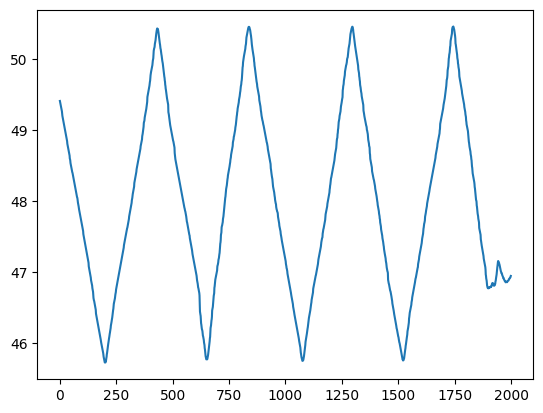

In [124]:
plt.plot(ypr[2000:4000,1])